### Predictions

**1. Prediction 1**

- With an unscaled dataset, the RandomForest classifier will do better because the logistic regression is sensitive to the large variance

**2. Prediction 2**

- With a scaled dataset, both model should predict about the same.

**3. Comparison #1**

- With an unscaled dataset, both model were "guessing", and the RandomForest classifier was overfitting the training data.

**3. Comparison #2**

- The results were an improvement from 56% to 76%

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
train_df = pd.read_csv(Path('Resources/Generator/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/Generator/2020Q1loans.csv'))

In [3]:
# Convert categorical data to numeric and separate target feature for testing data

train_x = train_df.drop(columns='target')
train_x = pd.get_dummies(train_x)
train_y = train_df['target']
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
# train_y = train_y['target'].map({'high risk':1, 'low risk':0})
train_y = label_enc.fit_transform(train_y)



In [4]:
# add missing dummy variables to testing set
test_x = test_df.drop(columns='target')
test_x = pd.get_dummies(test_x)
test_y = test_df['target']
test_y = label_enc.fit_transform(test_y)


In [5]:
matching_columns = []
for item in train_x.columns:
    if item in test_x.columns:
        pass
    else:
        matching_columns.append(item)
print(matching_columns)

['debt_settlement_flag_Y']


In [6]:
train_x = train_x.drop(columns='debt_settlement_flag_Y')

In [7]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=200000)
clf.fit(train_x, train_y)
print(f'Training Score: {clf.score(train_x, train_y)}')
print(f'Testing Socre: {clf.score(test_x, test_y)}')

Training Score: 0.7034482758620689
Testing Socre: 0.5659293917481922


In [8]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()
clf2.fit(train_x, train_y)
print(f'Training Score: {clf2.score(train_x, train_y)}')
print(f'Testing Socre: {clf2.score(test_x, test_y)}')


Training Score: 1.0
Testing Socre: 0.647809442790302


In [9]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_x)
X_train_scaled = scaler.transform(train_x)
X_test_scaled = scaler.transform(test_x)


In [10]:
# Train the Logistic Regression model on the scaled data and print the model score
clf = LogisticRegression(solver='lbfgs', max_iter=200000)
clf.fit(X_train_scaled, train_y)
print(f'Training Score: {clf.score(X_train_scaled, train_y)}')
print(f'Testing Socre: {clf.score(X_test_scaled, test_y)}')

Training Score: 0.710919540229885
Testing Socre: 0.7598894087622289


In [11]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf2.fit(X_train_scaled, train_y)
print(f'Training Score: {clf.score(X_train_scaled, train_y)}')
print(f'Testing Score: {clf.score(X_test_scaled, test_y)}')

Training Score: 0.710919540229885
Testing Score: 0.7598894087622289


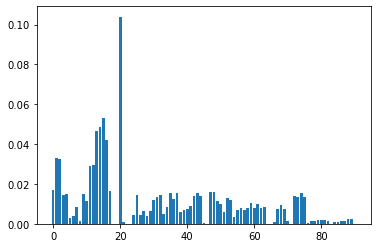

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
features = clf2.feature_importances_
# print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [14]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf2)
sel.fit(X_train_scaled, train_y)
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [15]:
train_selected = sel.transform(X_train_scaled)
test_selected = sel.transform(X_test_scaled)
clf = LogisticRegression(solver='lbfgs', max_iter=200000
)
clf.fit(train_selected, train_y)
print(f'Training Score: {clf.score(train_selected, train_y)}')
print(f'Testing Score: {clf.score(test_selected, test_y)}')


Training Score: 0.7110016420361248
Testing Score: 0.7692471288813271


In [16]:
clf2.fit(train_selected, train_y)
print(f'Training Score: {clf.score(train_selected, train_y)}')
print(f'Testing Score: {clf.score(test_selected, test_y)}')

Training Score: 0.7110016420361248
Testing Score: 0.7692471288813271
